In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from pymongo import MongoClient
import pandas as pd

# Connect to MongoDB
client = MongoClient('localhost', 27017)  # Update if your MongoDB is hosted elsewhere

db = client['AustinCrimeData']
collection = db['ArrestRecords2015_2020']

# Fetch data from the collection
cursor = collection.find()  # You can add query parameters inside find()
arrest_data_df = pd.DataFrame(list(cursor))

# Display the first few rows of the DataFrame
arrest_data_df.head()

,_id,arrest_date,arrest_time,sex,race,searched,reason_stopped,search_based_on,search_found,race_known,lng,lat
0,655bb2d9c44c083db3a50e4e,2015-01-01,2015-01-01 17:45:00,M,WHITE,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,ALCOHOL,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.740959,30.266851
1,655bb2d9c44c083db3a50e4f,2015-01-01,2015-01-01 04:26:00,M,WHITE,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.760173,30.274213
2,655bb2d9c44c083db3a50e50,2015-01-01,2015-01-01 00:02:00,M,HISPANIC OR LATINO,YES = 1,CALL FOR SERVICE,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.734192,30.266469
3,655bb2d9c44c083db3a50e51,2015-01-01,2015-01-01 02:36:00,M,HISPANIC OR LATINO,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.709152,30.350810
4,655bb2d9c44c083db3a50e52,2015-01-01,2015-01-01 02:29:00,M,HISPANIC OR LATINO,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,CASH,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.735396,30.249505


In [3]:
count = collection.count_documents({})
print(f"Number of documents: {count}")

Number of documents: 82846


In [4]:
backup_df = arrest_data_df.copy()
arrest_data_df.head()

,_id,arrest_date,arrest_time,sex,race,searched,reason_stopped,search_based_on,search_found,race_known,lng,lat
0,655bb2d9c44c083db3a50e4e,2015-01-01,2015-01-01 17:45:00,M,WHITE,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,ALCOHOL,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.740959,30.266851
1,655bb2d9c44c083db3a50e4f,2015-01-01,2015-01-01 04:26:00,M,WHITE,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.760173,30.274213
2,655bb2d9c44c083db3a50e50,2015-01-01,2015-01-01 00:02:00,M,HISPANIC OR LATINO,YES = 1,CALL FOR SERVICE,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.734192,30.266469
3,655bb2d9c44c083db3a50e51,2015-01-01,2015-01-01 02:36:00,M,HISPANIC OR LATINO,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.709152,30.350810
4,655bb2d9c44c083db3a50e52,2015-01-01,2015-01-01 02:29:00,M,HISPANIC OR LATINO,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,CASH,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.735396,30.249505


In [5]:
arrest_data_df.dtypes

_id                 object
arrest_date         object
arrest_time         object
sex                 object
race                object
searched            object
reason_stopped      object
search_based_on     object
search_found        object
race_known          object
lng                float64
lat                float64
dtype: object

In [6]:
arrest_data_df.head()

,_id,arrest_date,arrest_time,sex,race,searched,reason_stopped,search_based_on,search_found,race_known,lng,lat
0,655bb2d9c44c083db3a50e4e,2015-01-01,2015-01-01 17:45:00,M,WHITE,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,ALCOHOL,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.740959,30.266851
1,655bb2d9c44c083db3a50e4f,2015-01-01,2015-01-01 04:26:00,M,WHITE,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.760173,30.274213
2,655bb2d9c44c083db3a50e50,2015-01-01,2015-01-01 00:02:00,M,HISPANIC OR LATINO,YES = 1,CALL FOR SERVICE,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.734192,30.266469
3,655bb2d9c44c083db3a50e51,2015-01-01,2015-01-01 02:36:00,M,HISPANIC OR LATINO,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,NOTHING,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.709152,30.350810
4,655bb2d9c44c083db3a50e52,2015-01-01,2015-01-01 02:29:00,M,HISPANIC OR LATINO,YES = 1,VIOLATION OF TRANSPORTATION CODE/VEHICLE LAWS,INCIDENTAL TO ARREST,CASH,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,-97.735396,30.249505


In [7]:
# Group by race and sex and count the occurrences
arrest_counts = arrest_data_df.groupby(['race', 'sex']).size().reset_index(name='count')

# Sort the results for better visualization and analysis
arrest_counts_sorted = arrest_counts.sort_values(by='count', ascending=False)

print(arrest_counts_sorted)


                              race         sex  count
9               HISPANIC OR LATINO           M  27226
16                           WHITE           M  18816
5                            BLACK           M  15426
15                           WHITE           F   8352
8               HISPANIC OR LATINO           F   7198
4                            BLACK           F   4384
3                            ASIAN           M    642
11                  MIDDLE EASTERN           M    244
2                            ASIAN           F    212
13                         UNKNOWN           M    150
12                         UNKNOWN           F     72
7        HAWAIIAN/PACIFIC ISLANDER           M     38
10                  MIDDLE EASTERN           F     32
1   AMERICAN INDIAN/ALASKAN NATIVE           M     30
0   AMERICAN INDIAN/ALASKAN NATIVE           F     10
6        HAWAIIAN/PACIFIC ISLANDER           F      6
17                      not_listed  not_listed      6
14                         U

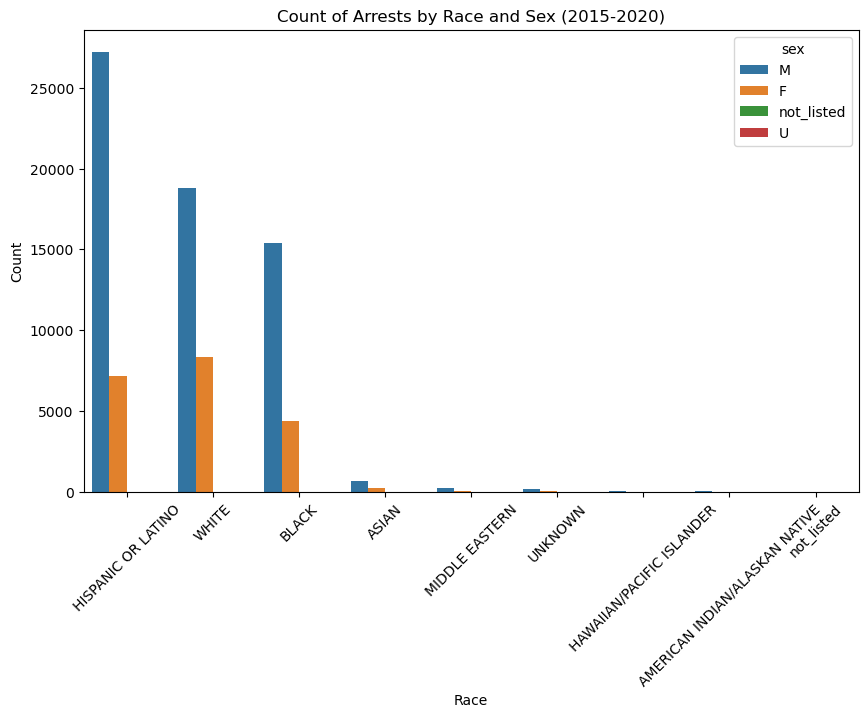

In [8]:
# Makin' a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=arrest_counts_sorted, x='race', y='count', hue='sex')
plt.title('Count of Arrests by Race and Sex (2015-2020)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

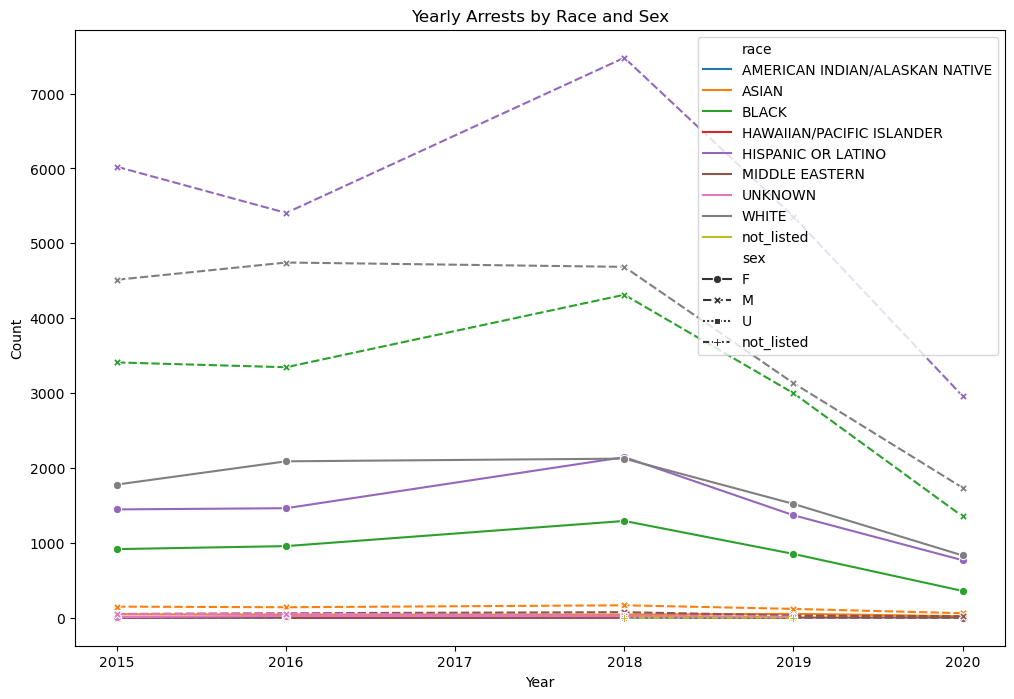

In [9]:
arrest_data_df['year'] = pd.to_datetime(arrest_data_df['arrest_date']).dt.year

# Group by year, race, and sex
yearly_counts = arrest_data_df.groupby(['year', 'race', 'sex']).size().reset_index(name='count')

# Plot the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_counts, x='year', y='count', hue='race', style='sex', markers=True)
plt.title('Yearly Arrests by Race and Sex')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [10]:
print(arrest_data_df['searched'].unique())

['YES = 1' 'NO = 2' 'NO' 'YES' 'not_listed']


In [11]:
def standardize_searched(value):
    if value in ['YES = 1', 'YES']:
        return 1
    elif value in ['NO = 2', 'NO']:
        return 0
    else:
        return 0  # or you can decide to map 'not_listed' to either 0 or 1, or drop these entries

In [12]:
print(arrest_data_df)

                            _id arrest_date          arrest_time sex  \
0      655bb2d9c44c083db3a50e4e  2015-01-01  2015-01-01 17:45:00   M   
1      655bb2d9c44c083db3a50e4f  2015-01-01  2015-01-01 04:26:00   M   
2      655bb2d9c44c083db3a50e50  2015-01-01  2015-01-01 00:02:00   M   
3      655bb2d9c44c083db3a50e51  2015-01-01  2015-01-01 02:36:00   M   
4      655bb2d9c44c083db3a50e52  2015-01-01  2015-01-01 02:29:00   M   
...                         ...         ...                  ...  ..   
82841  655bc070d4e628e5592e1715  2020-10-15  2020-10-15 07:15:00   M   
82842  655bc070d4e628e5592e1716  2020-03-24  2020-03-24 08:10:00   M   
82843  655bc070d4e628e5592e1717  2020-06-02  2020-06-02 05:37:00   M   
82844  655bc070d4e628e5592e1718  2020-08-11  2020-08-11 23:42:00   M   
82845  655bc070d4e628e5592e1719  2020-05-08  2020-05-08 18:57:00   M   

                     race searched  \
0                   WHITE  YES = 1   
1                   WHITE  YES = 1   
2      HISPANIC OR LA

In [13]:
print(arrest_data_df['searched'].unique())

['YES = 1' 'NO = 2' 'NO' 'YES' 'not_listed']


In [18]:
arrest_data_df = arrest_data_df.dropna(subset=['searched'])

In [ ]:

# This first one runs but gives off numbers but my second one running further down works fine! Keeping this one so it keeps the 
# integrity of the first one 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Preprocessing
le = LabelEncoder()
arrest_data_df['sex_encoded'] = le.fit_transform(arrest_data_df['sex'])
arrest_data_df['race_encoded'] = le.fit_transform(arrest_data_df['race'])
arrest_data_df['searched'] = arrest_data_df['searched'].map({'YES = 1': 1, 'NO = 0': 0})

# Replace NaN in 'searched' with the most frequent value (mode)
searched_mode = arrest_data_df['searched'].mode()[0]
arrest_data_df['searched'] = arrest_data_df['searched'].fillna(searched_mode)





# Feature selection
features = ['sex_encoded', 'race_encoded', 'lng', 'lat']  
X = arrest_data_df[features]
y = arrest_data_df['searched']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model prediction and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     16570

    accuracy                           1.00     16570
   macro avg       1.00      1.00      1.00     16570
weighted avg       1.00      1.00      1.00     16570



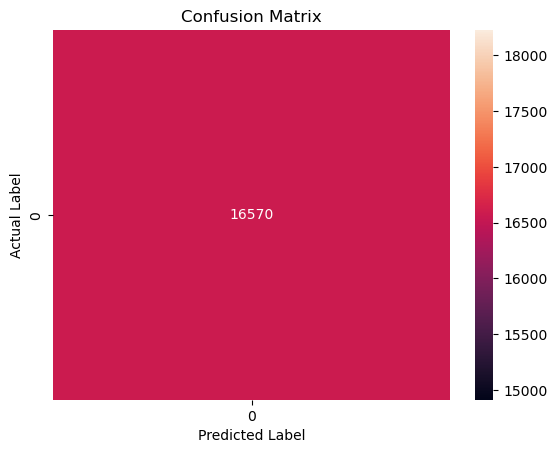

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [16]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index = feature_names, columns=['Importance']).sort_values('Importance', ascending=False)

print(feature_importances)

              Importance
sex_encoded          0.0
race_encoded         0.0
lng                  0.0
lat                  0.0


In [18]:
from sklearn.model_selection import GridSearchCV

# Example of setting up a grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", CV_rfc.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


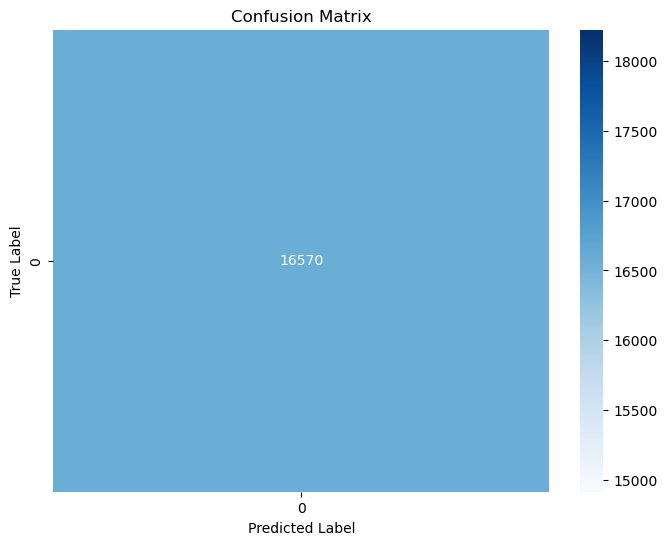

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [22]:
#sample data to test the prediction model!

test_data = pd.DataFrame({
    'sex_encoded': [0],  
    'race_encoded': [1],  
    'lng': [-97.75],     
    'lat': [30.27]        
})

In [24]:
predicted_searched = model.predict(test_data)
print("Predicted 'searched' status:", predicted_searched)

Predicted 'searched' status: [1.]


In [25]:
predicted_probabilities = model.predict_proba(test_data)
print("Predicted probabilities:", predicted_probabilities)

Predicted probabilities: [[1.]]
